# READ DATA USING NIH CSV FILE

In [2]:
## IMPORTS AND READ IN DATAFRAM
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


df = pd.read_csv('Data_Entry_2017_v2020.csv')

## COUNT THE FINDINGS (DIAGNOSES) IN NIH DATASET

In [3]:
## Prints the first 5 records so we can see how the datafram is formatted
# print(df[['Finding Labels','View Position']].head())
print('Show the different findings/diagnoses represented in the NIH data');
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
## Print all the diagnoses (aka findings)
print(df['Finding Labels'].value_counts());
## Print the number of PA & AP view studies in the data
print('Show how many image are PA vs AP');
print(df['View Position'].value_counts( ));
print();
## Find out how many studies have fibrosis and how many have ONLY fibrosis as finding

Show the different findings/diagnoses represented in the NIH data
No Finding                                                                                              60361
Infiltration                                                                                             9547
Atelectasis                                                                                              4215
Effusion                                                                                                 3955
Nodule                                                                                                   2705
Pneumothorax                                                                                             2194
Mass                                                                                                     2139
Effusion|Infiltration                                                                                    1603
Atelectasis|Infiltration                              

## SHOW PARENCHYMAL FINDINGS

In [17]:
##Search for just the studies that have fibrosis or edema (another diagnosis can be included)
filtered_df = df[df['Finding Labels'].str.contains("Fibrosis|Edema")];
print(filtered_df['Finding Labels'].value_counts().head(40));
## count how many PA vs AP studies exist with just the diagnosis Fibrosis, Edema and No Finding
print()
filtered_df = df[df['Finding Labels'].str.fullmatch("Fibrosis|Edema|No Finding")];
print(pd.crosstab(filtered_df['View Position'],filtered_df['Finding Labels']));
#print(df.describe()); 

Fibrosis                                    727
Edema                                       628
Edema|Infiltration                          392
Edema|Effusion                              189
Fibrosis|Infiltration                       185
Edema|Infiltration|Pneumonia                137
Edema|Effusion|Infiltration                 127
Atelectasis|Fibrosis                        104
Edema|Pneumonia                              83
Fibrosis|Pleural_Thickening                  70
Fibrosis|Nodule                              66
Effusion|Fibrosis                            59
Consolidation|Edema                          49
Atelectasis|Edema                            48
Cardiomegaly|Edema                           35
Atelectasis|Edema|Infiltration               35
Fibrosis|Mass                                34
Edema|Infiltration|Nodule                    31
Edema|Nodule                                 28
Consolidation|Edema|Infiltration             25
Consolidation|Fibrosis                  

## Query the datafram for Fibrosis images.  Get records for 3 PA films and 3 AP films. 

In [19]:
print(df.columns)
# df[df['Finding Labels']=='Fibrosis' ]
# df['View Position'] = df['View Position'].astype('str') 
# df[df['Finding Labels'].str.contains('Fibrosis')]

# df.query("`Finding Labels` == 'Fibrosis' & `View Position` == 'AP'")
shorty = df[(df['Finding Labels']=='Fibrosis') & (df['View Position']=='PA')][0:3] 
shorty2 = df[(df['Finding Labels']=='Fibrosis') & (df['View Position']=='AP')][0:3]
shorty = pd.concat( [shorty, shorty2], axis=0)
shorty

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')


Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
99    00000022_001.png       Fibrosis            1          22           48   
105   00000024_000.png       Fibrosis            0          24           52   
295   00000067_000.png       Fibrosis            0          67           61   
2020  00000517_001.png       Fibrosis            0         517           63   
2183  00000573_004.png       Fibrosis            9         573           55   
2681  00000710_001.png       Fibrosis            1         710           56   

     Patient Gender View Position  OriginalImage[Width  Height]  \
99                M            PA                 2500     2048   
105               M            PA                 2048     2500   
295               F            PA                 2992     2991   
2020              F            AP                 2048     2500   
2183              M            AP                 3056     2544   
2681              F            AP                 2500     2048   

      OriginalImagePixelSpacing[x     y]  
99                          0.168  0.168  
105                         0.168  0.168  
295                         0.143  0.143  
2020                        0.168  0.168  
2183                        0.139  0.139  
2681                        0.171  0.171

## Show 3 PA Fibrosis images and 3 AP Fibrosis images
Notice that one of the AP images looks to actualy be a lateral.  Possibly a portable?  The second AP image is labelled as a portable.  Overall quality of PA images are superior, as you might expect.

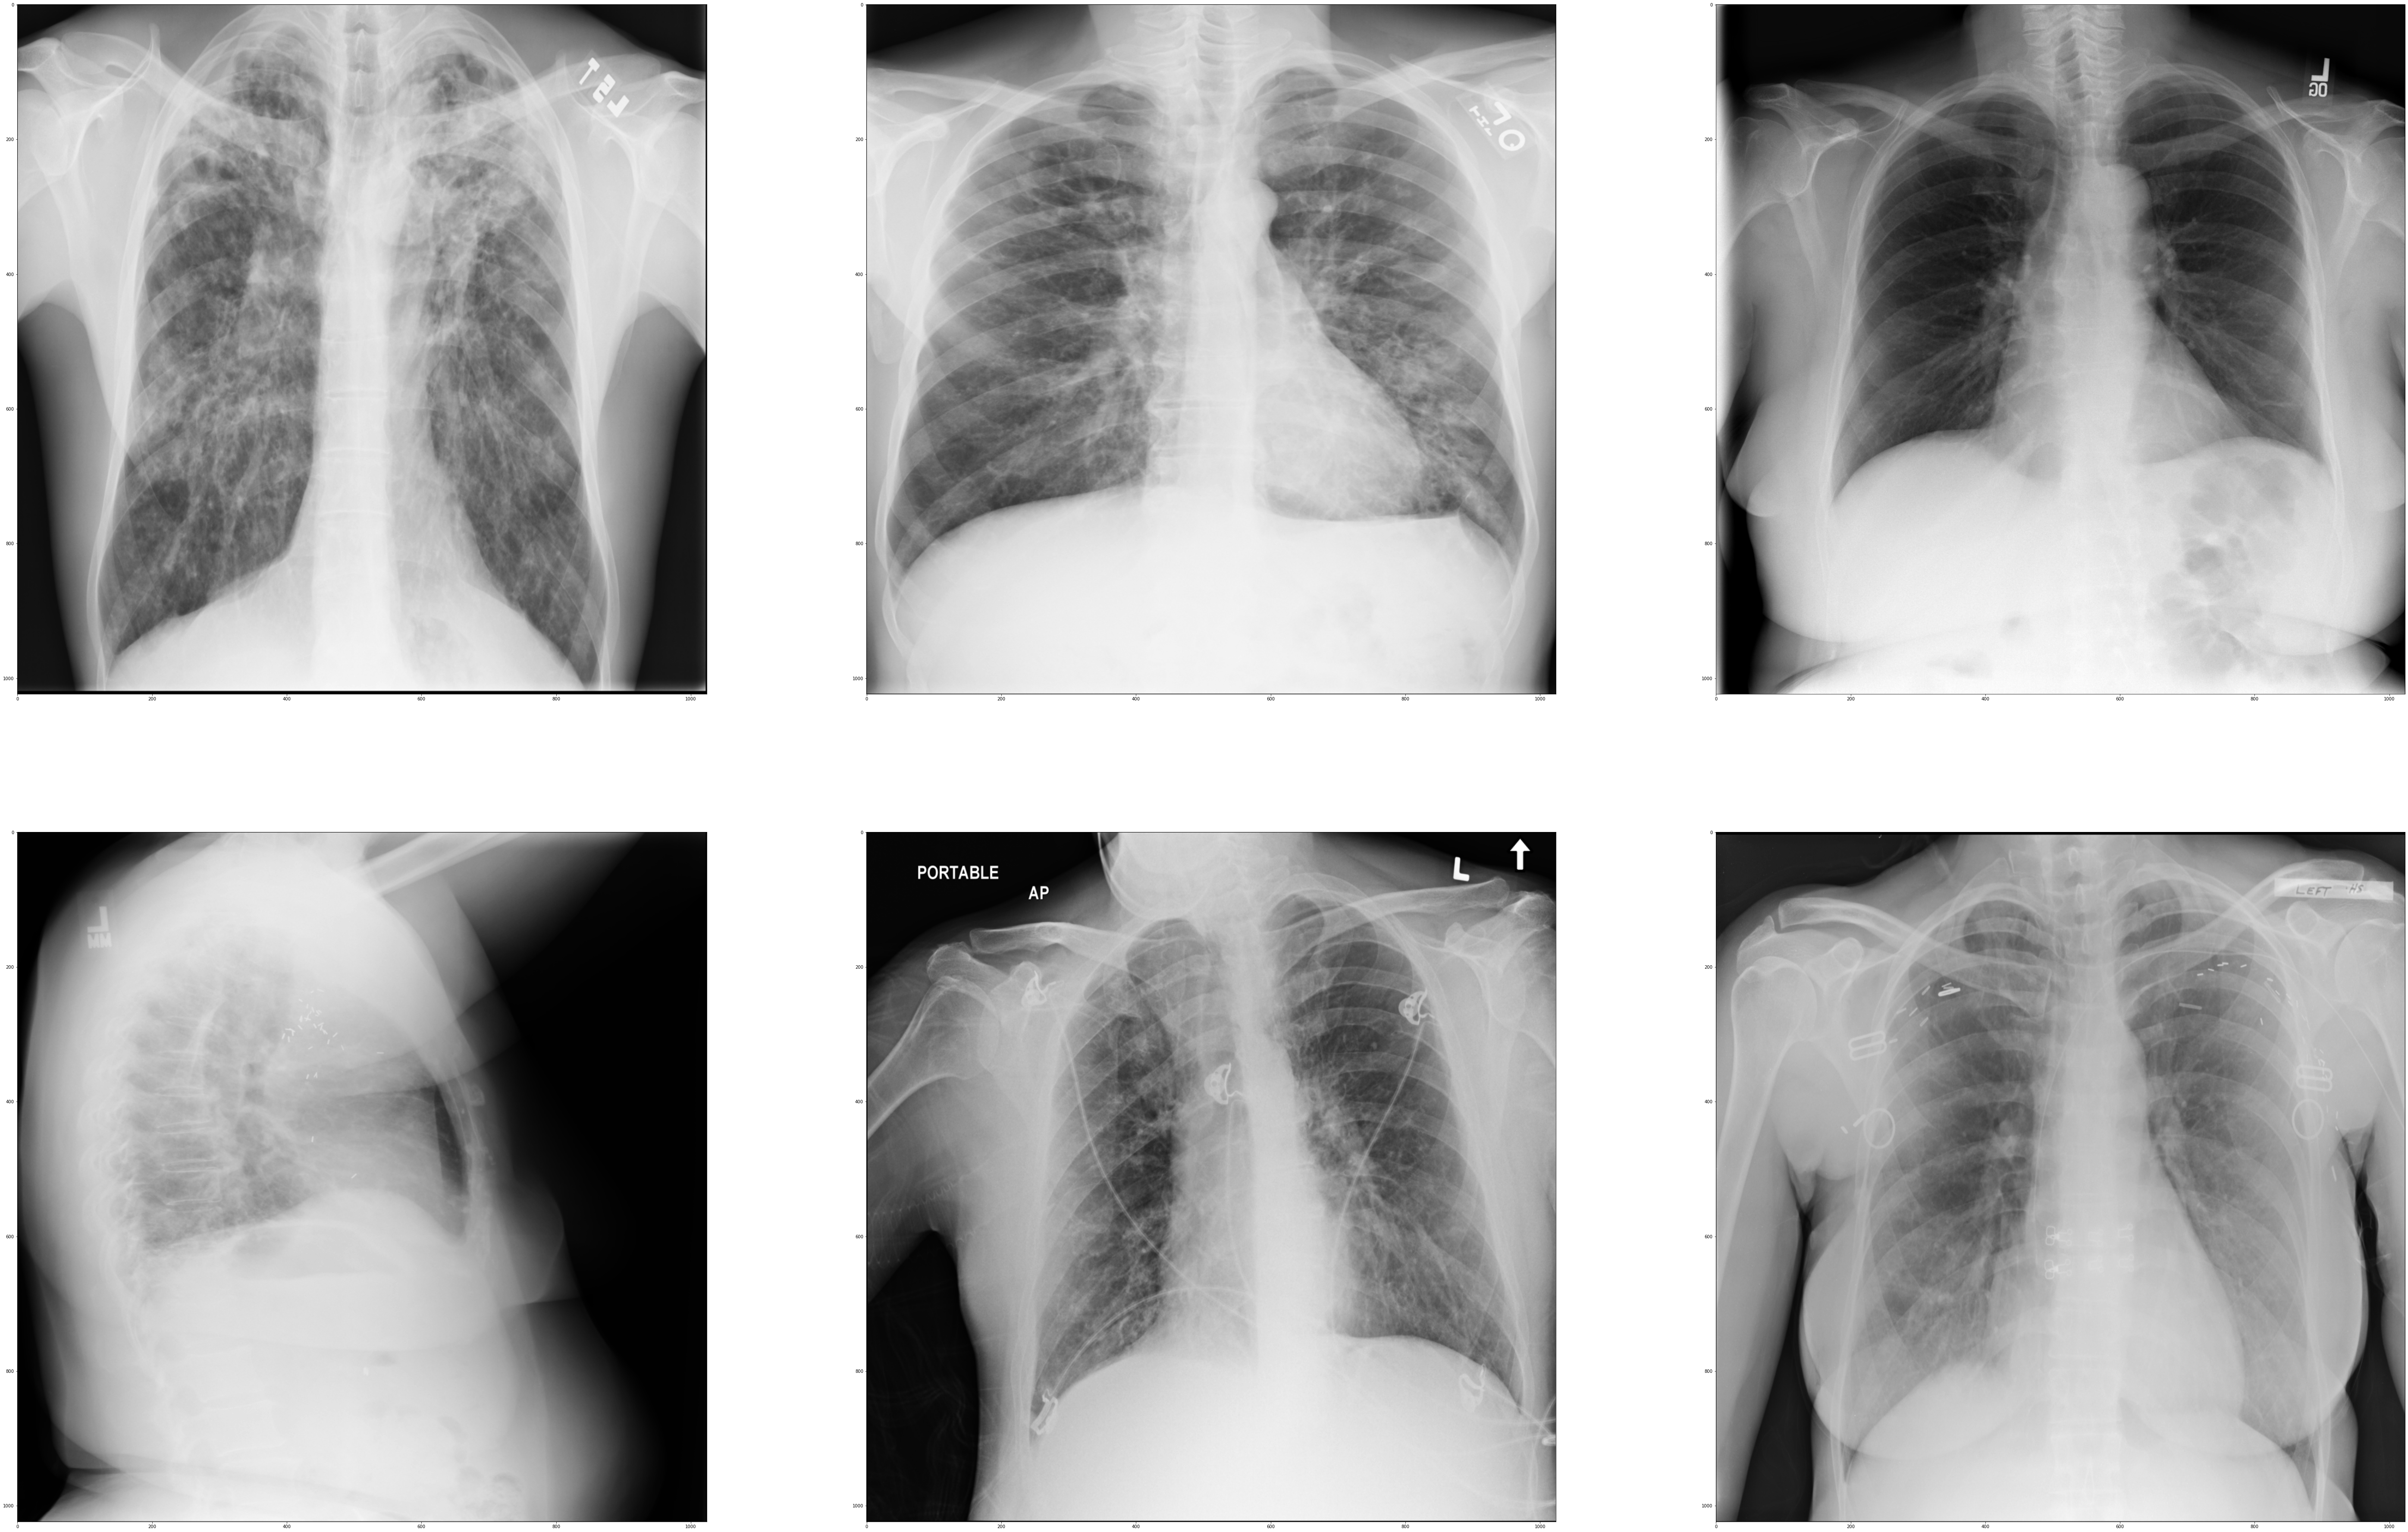

In [20]:
images = []
for index, row in shorty.iterrows():
  images.append( mpimg.imread(f'dicom/NIH_images/{row["Image Index"]}') )
  # imgplot = plt.imshow(img, cmap='gray')

plt.figure(figsize=(100,100))
columns = 3
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns) + 1, columns, i + 1)
    plt.imshow(image, cmap='gray')